In [1]:
import sys
sys.path.append('/Users/gary/anaconda/lib/python2.7/site-packages')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [14]:
# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]

x_obstacle, y_obstacle = 0.0, 0.0
alpha_obstacle, a_obstacle, b_obstacle = 1.0, 1e3, 2e3

p = -alpha_obstacle * np.exp(-((x - x_obstacle)**2 / a_obstacle
                               + (y - y_obstacle)**2 / b_obstacle))

In [24]:
y

array([[ 10.       ,  10.       ,  10.       , ...,  10.       ,
         10.       ,  10.       ],
       [  9.7979798,   9.7979798,   9.7979798, ...,   9.7979798,
          9.7979798,   9.7979798],
       [  9.5959596,   9.5959596,   9.5959596, ...,   9.5959596,
          9.5959596,   9.5959596],
       ...,
       [ -9.5959596,  -9.5959596,  -9.5959596, ...,  -9.5959596,
         -9.5959596,  -9.5959596],
       [ -9.7979798,  -9.7979798,  -9.7979798, ...,  -9.7979798,
         -9.7979798,  -9.7979798],
       [-10.       , -10.       , -10.       , ..., -10.       ,
        -10.       , -10.       ]])

In [15]:
# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p, np.diff(y[:2, 0]), np.diff(x[0, :2]))

ValueError: when 1d, distances must match the length of the corresponding dimension

In [19]:
print(p, np.diff(y[:2,0]), np.diff(x[0, :2]))

[[-0.86070798 -0.86415735 -0.86754973 ... -0.86754973 -0.86415735
  -0.86070798]
 [-0.86243094 -0.86588722 -0.86928639 ... -0.86928639 -0.86588722
  -0.86243094]
 [-0.86412208 -0.86758514 -0.87099098 ... -0.87099098 -0.86758514
  -0.86412208]
 ...
 [-0.86412208 -0.86758514 -0.87099098 ... -0.87099098 -0.86758514
  -0.86412208]
 [-0.86243094 -0.86588722 -0.86928639 ... -0.86928639 -0.86588722
  -0.86243094]
 [-0.86070798 -0.86415735 -0.86754973 ... -0.86754973 -0.86415735
  -0.86070798]] [-0.2020202] [-0.2020202]


NameError: name 'dx' is not defined

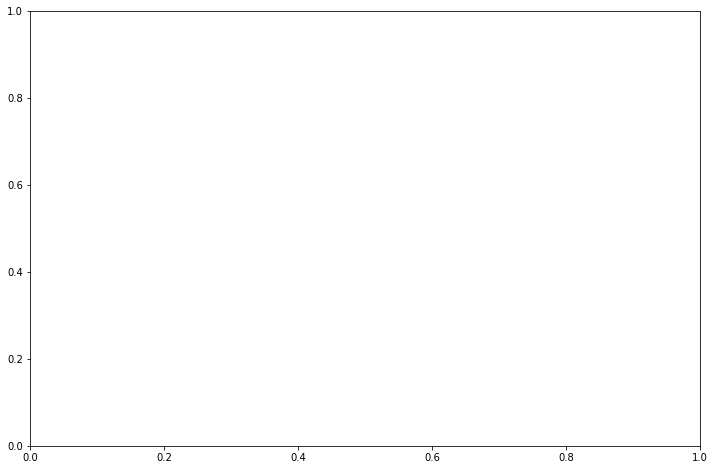

In [8]:
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy, p)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

NameError: name 'dx' is not defined

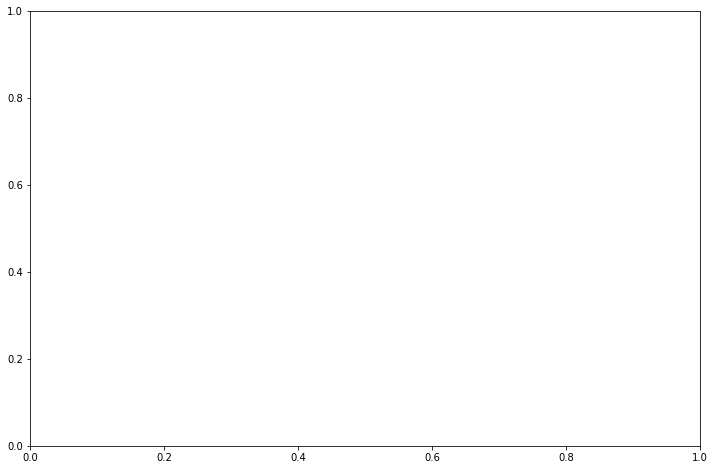

In [9]:
# Every 3rd point in each direction.
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
ax.quiver(x[skip], y[skip], dx[skip], dy[skip], p[skip])
ax.set(aspect=1, title='Quiver Plot')
plt.show()

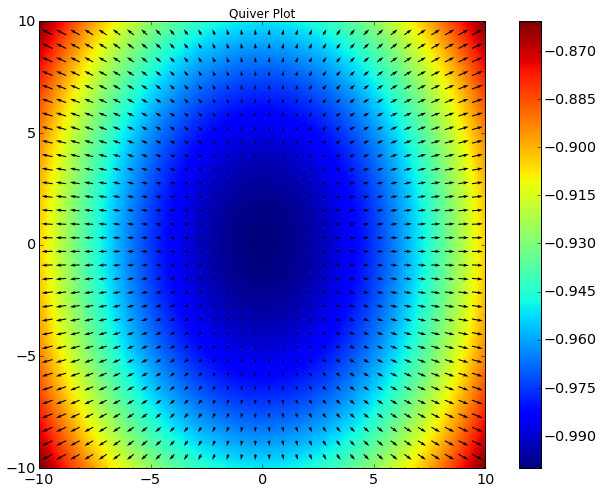

In [14]:
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
im = ax.imshow(p, extent=[x.min(), x.max(), y.min(), y.max()])
ax.quiver(x[skip], y[skip], dx[skip], dy[skip])

fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

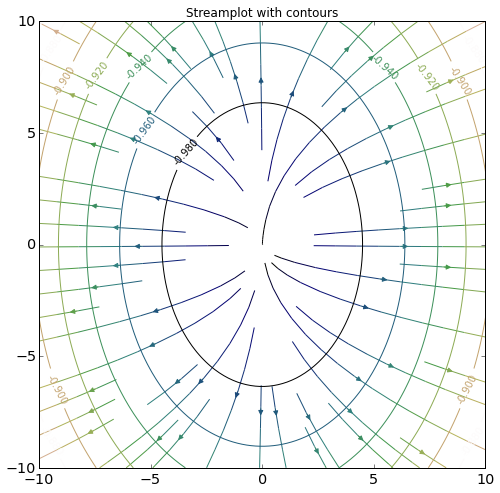

In [19]:
fig, ax = plt.subplots()

ax.streamplot(x, y, dx, dy, color=p, density=0.7, cmap='gist_earth')

cont = ax.contour(x, y, p, cmap='gist_earth')
ax.clabel(cont)

ax.set(aspect=1, title='Streamplot with contours')
plt.show()

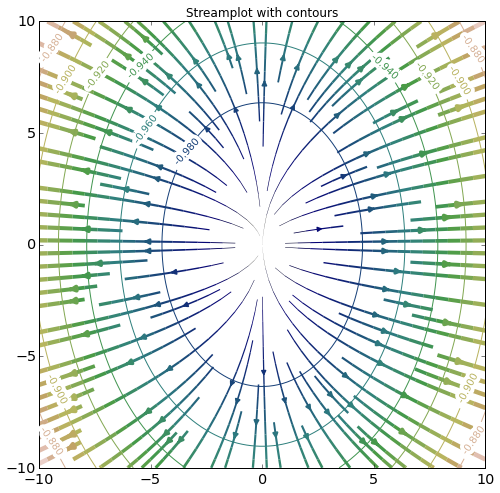

In [18]:
from matplotlib.patheffects import withStroke

fig, ax = plt.subplots()

ax.streamplot(x, y, dx, dy, linewidth=250*np.hypot(dx, dy),
              color=p, density=1.2, cmap='gist_earth')

cont = ax.contour(x, y, p, cmap='gist_earth', vmin=p.min(), vmax=p.max())
labels = ax.clabel(cont)

plt.setp(labels, path_effects=[withStroke(linewidth=8, foreground='w')])

ax.set(aspect=1, title='Streamplot with contours')
plt.show()